# Data Argumentation
A common problem, is the amount of data at hand to enter the models, for models to present the expected results it's necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not at ones diposal.
This is where the **Data Augmentation** technique comes in handy, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are different from each other it would take them as totally unique images.

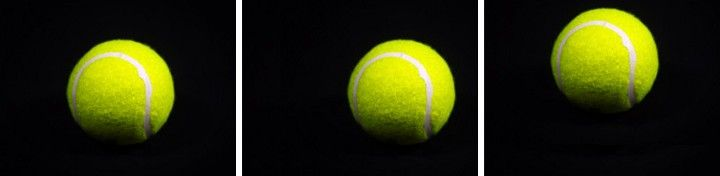



The same ball with some translations.



So if we work with images, it is necessary to make some small alterations to our dataset so we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is more usual to use a variety of augmentation techniques at the same time during training.


In [ ]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica

First we upload an image from the internet

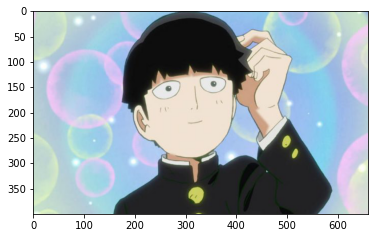

In [ ]:
url = 'https://www.tierragamer.com/wp-content/uploads/2019/07/Mob-Psycho-100-Videojuego-660x400.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


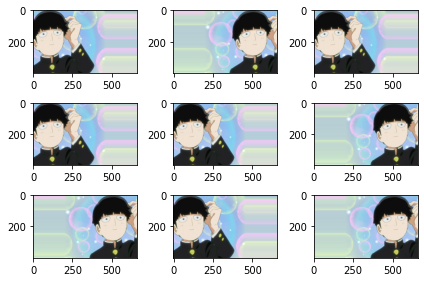

In [ ]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip inverts the pixel's rows and columns being the case of a vertical or an horizontal flip respectively. 

The argument is specified according to a boolean argument **horizontal_flip** or **vertical_flip** for the class **ImageDataGenerator**

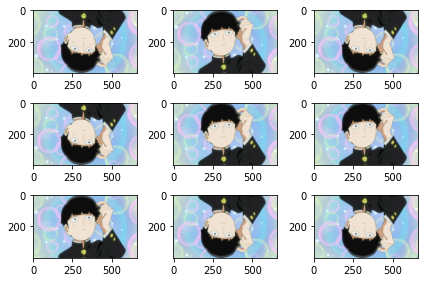

In [ ]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is random evenly sampled of the zoom region for each dimension (width, height) distictly. 

Float or [Inferior limit, superior limit]. Range for random zoom. Whether is a float [Inferior limit, superior limit] = [1-zoom_range, 1 + zoom_range]


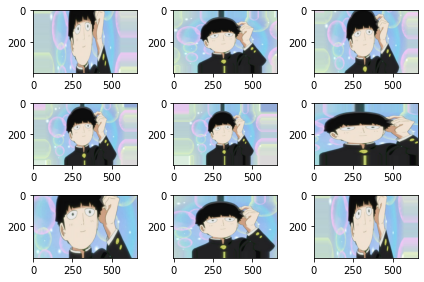

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a certain amount of degrees from 0 to 360. It is likely to rotate the pixels out of the image frame leaving some frame areas without pixel data that must be completed. 


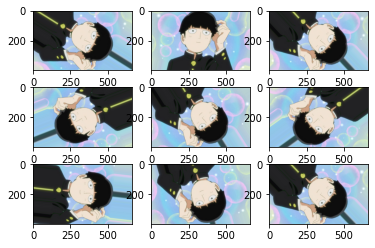

In [ ]:
datagen = ImageDataGenerator(rotation_range=200)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allow us to increment the amount of data in the used dataset, in many works it is used an increment of the data to increase the number of training images and improve the precision. 



              featurewise_center: Boolean, puts the avarage of each element in zero of all the data. 
              samplewise_center**: Boolean, puts the average of each sample to zero. 
              featurewise_std_normalization: Boolean, divides the input of standar deviation (std) of the dataset, according to caracteristics. 
              samplewise_std_normalization: Boolean, divides each data by its std. 
              zca_epsilon: The default data is 1e-6.
              zca_whitening: Boolean, shows if the bleaching ZCA applies. 

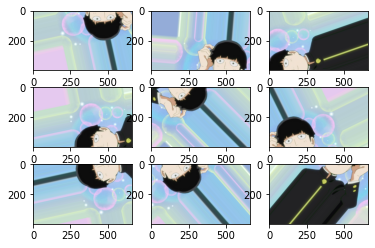

In [ ]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [150,150],   
            height_shift_range           = [200,200],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

# Arguments for the ImageDataGenerator class:



*   **directory**: Directory where the data is located. If *labels* is "inferred", it should contain subdirectories, each containing images for a class. Otherwise, the directory structure is ignored.
*   **labels**: Either "inferred" (labels are generated from the directory structure), or a list/tuple of integer labels of the same size as the number of image files found in the directory. Labels should be sorted according to the alphanumeric order of the image file paths (obtained via *os.walk(directory)* in Python).

*   **label_mode**: - 'int': means that the labels are encoded as integers (e.g. for *sparse_categorical_crossentropy loss)*. - 'categorical' means that the labels are encoded as a categorical vector (e.g. for *categorical_crossentropy* loss). - 'binary' means that the labels (there can be only 2) are encoded as *float32* scalars with values 0 or 1 (e.g. for *binary_crossentropy*). - None (no labels).*

*  **class_names**: Only valid if "labels" is "inferred". This is the explict list of class names (must match names of subdirectories). Used to control the order of the classes (otherwise alphanumerical order is used).

* **color_mode**: One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.

* **batch_size**: Size of the batches of data. Default: 32.

* **image_size**: Size to resize images to after they are read from disk. Defaults to *(256, 256)*. Since the pipeline processes batches of images that must all have the same size, this must be provided.

* **shuffle**: Whether to shuffle the data. Default: True. If set to False, sorts the data in alphanumeric order.

* **seed**: Optional random seed for shuffling and transformations.
validation_split: Optional float between 0 and 1, fraction of data to reserve for validation.

* **subset**: One of "training" or "validation". Only used if *validation_split* is set.

* **interpolation**: String, the interpolation method used when resizing images. Defaults to *bilinear*. Supports *bilinear, nearest, bicubic, area, lanczos3, lanczos5, gaussian, mitchellcubic.*

* **follow_links**: Whether to visits subdirectories pointed to by symlinks. Defaults to False.

Now we considerate words, the necessary work is not as easy thanks to the intrinsic complexity of language (we cannoy replace each word by its synoninum and, even if we do we take the risk of changing the meaning of a sentence completly).

There are libraries that can help us to do this task, let's start analizing the following:

1.   Text Attack
2.   Google Trans

# TextAttack
Is a Python framework for enemy assaults, enemy training and increment of data in NLP. We will focus only in the increasing of data. 


In [1]:
!pip install textattack

     |████████████████████████████████| 327kB 8.4MB/s 
     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 686kB 16.6MB/s 
     |████████████████████████████████| 102kB 9.3MB/s 
     |████████████████████████████████| 3.0MB 27.2MB/s 
     |████████████████████████████████| 235kB 66.5MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 153kB 69.7MB/s 
     |████████████████████████████████| 1.7MB 69.0MB/s 
     |████████████████████████████████| 1.1MB 59.5MB/s 
     |████████████████████████████████| 245kB 69.8MB/s 
     |████████████████████████████████| 317kB 65.2MB/s 
     |████████████████████████████████| 778kB 64.7MB/s 
     |████████████████████████████████| 204kB 65.9MB/s 
     |████████████████████████████████| 245kB 68.1MB/s 
     |████████████████████████████████| 17.3MB 251kB/s 
     |████████████████████████████████| 102kB 11.8MB/s 
     |████████████████████████████████| 122kB 68.1MB/s

In [2]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-17 02:09:56 INFO: Downloading default packages for language: en (English)...
2020-10-17 02:10:34 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [3]:
text = "Trying to form thoughts. Slow but i'll keep you updated."

TextAttack provide us 4 metohds for data increase. 



## WordNetAugmenter
Increase the text replacing by synonymous of the thesaurus (dictionary of synonyms) of WordNet. 

WordNet is a lexical database of english. Nouns, verbs, adjectives and adverbs are batched in sets of cognitive synonyms (synsets), each of them express a different concept. WordNet seems superficially like a thesaurus, since it batches word in function on its meaning. 



In [4]:
aug = WordNetAugmenter();
aug.augment(text)

["Trying to form thoughts. decelerate but i'll keep you updated."]


## EmbeddingAugmenter
 Increases the text transforming words with its incrustations, with a restriction to guarantee its resemblance to the cosine of at least 0.8.



In [5]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:18<00:00, 26.1MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpcks7_boj.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


["Tempting to form thoughts. Slow but i'll keep you updated."]

## CharSwapAugmenter
Increases the text replacing, erasing, inserting and changing the adyacent characters. 


In [6]:
aug = CharSwapAugmenter()
aug.augment(text)

["Trying to form thoughts. Slow but i'll keep you updaetd."]


## EasyDataAugmenter
This increases the text with only one replacement combination of WordNet synonymous, erasing words, changing the order of words and synonymous insertions. This 4 functions occur randomly. Then we will obtain different result each time we run the code. This returns 4 increased results, unlike other methods. 



In [7]:
aug = EasyDataAugmenter()
aug.augment(text)

["Trying to form thoughts. Slow but i'll livelihood you updated.",
 "but to form thoughts. Slow Trying i'll keep you updated.",
 "Trying to form thoughts. Slow but i'll keep you.",
 "Trying dim to form thoughts. Slow but i'll keep you updated."]

Googletrans uses the API Ajax from Google Translate to detect the language translation. 

The key parameters for the method **translate()** are:



1.   **src**: original language, this parameter is optional since **googletrans** will detect it. 
2.   **dest**: language destination. Mandatory parameter.  
1.   **text**: The text that is going to be translated from the original to the destinated language. Mandatory parameter.  





 When using this method a retranslation will occur, we pass from the original language to a destinated language and then we go back to the original, during this retranslation there is a slight change in the sentence between the original test and the retranslated text, but the general meaning of the sentence remains the same. 


The supported languages can be consulted on: https://cloud.google.com/translate/docs/languages?hl=es

To obtain better result it is recommeded to do some trials with the languages, if the destinated language is similar the translated retains information, however we can face the problem of a very literal translation, this can be a bit of a trial and error problem. 



*Some* language examples:


*   Afrikáans	'af'

*   Chinese (simplified) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japanese	'ja'
*   Latín	'la'


*   Spanish	'es'


*   Turkmen	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [8]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 972kB 16.3MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 102kB 9.5MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=7f44ecee7c2356ed8261da598f82fa76d5708ae28d476d5e3d9989ff95017dc7
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=561dc4d765ea438b418402287197e8806bd8b43e5bf9b90fc5899f01a166d01d
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [9]:
from googletrans import Translator
translator = Translator()

In [10]:
origin_text = "My God, my God, why hast thou forsaken me?"
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

My God, my God, why hast thou forsaken me?
私の神、私の神、なぜあなたは私を見捨てたのですか？
My god, my god, why did you abandon me?


In [12]:
origin_text = "My God, my God, why hast thou forsaken me?"
text_trans = translator.translate(text=origin_text, dest='es').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

My God, my God, why hast thou forsaken me?
Dios mío, Dios mío, ¿por qué me has desamparado?
My God, my God, why have you forsaken me?


In [13]:
origin_text = "My God, my God, why hast thou forsaken me?"
text_trans = translator.translate(text=origin_text, dest='la').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

My God, my God, why hast thou forsaken me?
Deus meus, Deus meus, ut quid me dereliquisti?
O my God, my God, my God, why hast thou forsaken me?
